# DATA SCIENCE CHALLENGE QUESTION #1

Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

 - Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
 - What metric would you report for this dataset?
 - What is its value?

In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [3]:
# Importing the data 
store_df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
# Check the data was imported
store_df.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


### Structure of the data

In [4]:
# Checking number of rows
print(f'There are {store_df.shape[0]} rows')
# Checking number of columns
print(f'There are {store_df.shape[1]} columns')

There are 5000 rows
There are 7 columns


### Missing Values and Duplicates

In [5]:
# Check data types and missing values
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [6]:
# Check for duplicated values
print(store_df.duplicated().sum())

0


It appears as though the data does not have any missing, or duplicate values Therefore we will move onto checking data distrubutions.

### Data Distribution

In [7]:
# Checking the desrcription of the order_amount
print(store_df.describe())

          order_id      shop_id      user_id   order_amount  total_items
count  5000.000000  5000.000000  5000.000000    5000.000000   5000.00000
mean   2500.500000    50.078800   849.092400    3145.128000      8.78720
std    1443.520003    29.006118    87.798982   41282.539349    116.32032
min       1.000000     1.000000   607.000000      90.000000      1.00000
25%    1250.750000    24.000000   775.000000     163.000000      1.00000
50%    2500.500000    50.000000   849.000000     284.000000      2.00000
75%    3750.250000    75.000000   925.000000     390.000000      3.00000
max    5000.000000   100.000000   999.000000  704000.000000   2000.00000


As we can see there is already a concerning value with the standard diviation **std** and the **max** values of `order_amount` and `total_items`. We will need to further investigate what is going on.

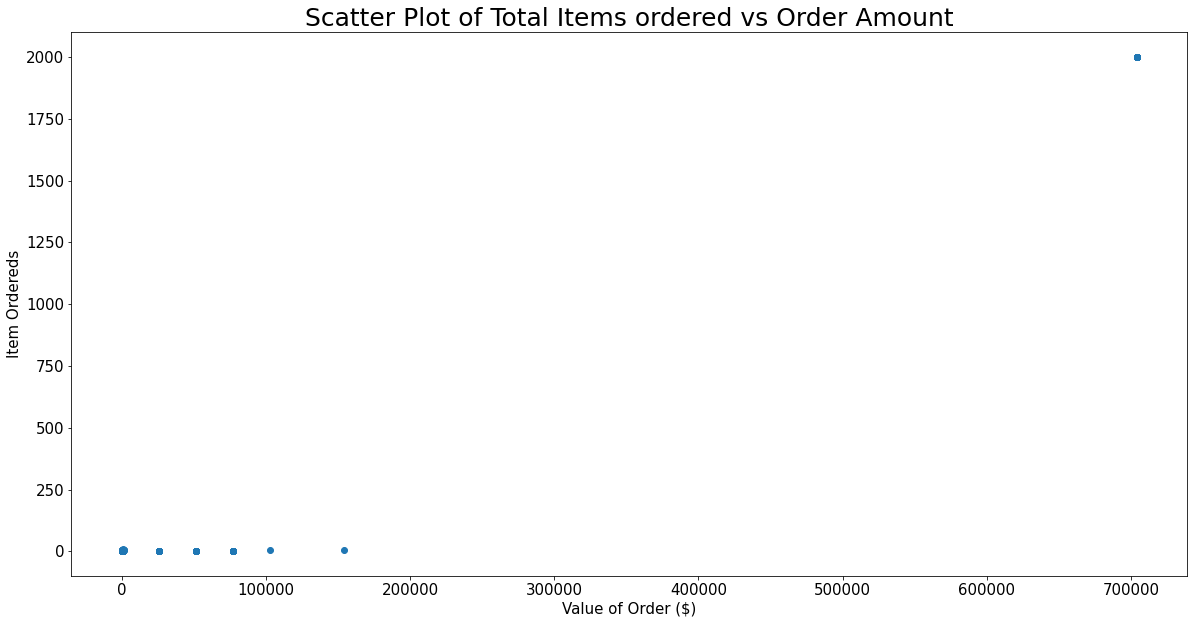

In [13]:
# Initialize graph
plt.figure(figsize=(20,10))
# Create scatter plot
plt.scatter(store_df['order_amount'], store_df['total_items'])
# Set title
plt.title('Scatter Plot of Total Items ordered vs Order Amount', size = 25)
# Set x label
plt.xlabel('Value of Order ($)', size=15)
# Set y label
plt.ylabel('Item Ordereds', size=15)
# Configure x ticks
plt.xticks(size = 15)
# Configure y ticks
plt.yticks(size = 15)
plt.show()

## Examining outliers

In [9]:
# Sort store_df based on order amount
sorted_df = store_df.sort_values(by=['order_amount'], ascending=False)
# Check
sorted_df.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


Upon investigating the outlier we see `user_id` = 607 frequintly make purchases of 2000 items totalling $704000 from the shop with `shop_id` = 42. While this may be intentional it should be investigated for possible errors. We will check how many transactions `user_id` = 607 makes.

In [10]:
# Filter records for user_id = 607
store_df[store_df['user_id'] == 607]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


## Question A
There is a large distribution in the `order_amount` column, with a max of 704,000 and a min of 90. The AOV of $3145.13 was calculated using the mean value, which is very susceptible to outliers in the data. When looking at the quartiles for `order_amount` and `total_items`, most of the values are around a reasonable values for shoes. However, the max is significantly higher. This difference is another indicator that there are outliers.

In [11]:
# Get the mean of order_amount
mean_order = store_df['order_amount'].mean()
# Get the mean of total_items
mean_items = store_df['total_items'].mean()

print(f'The mean average of the order is ${mean_order} with an mean of {mean_items} items sold')


The mean average of the order is $3145.128 with an mean of 8.7872 items sold



When calculating the AOV using the mean, we come out to the same value of $3,145.13 previously calculated. This was the error in the calculation; as mentioned before, the outliers in the data caused the incorrect value.

## Question B & C

In [12]:
# Get the median of order_amount
median_order = store_df['order_amount'].median()
# Get the median of total_items
median_items = store_df['total_items'].median()

print(f'The median average of the order is ${median_order} with an median of {median_items} items sold')

The median average of the order is $284.0 with an median of 2.0 items sold


The preferred method for this calculation should be to use the median, which is not affected by outliers. When using this method, the value comes out to $284, which seems more reasonable given the context.